In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from automata.configs.config_enums import ConfigCategory
from automata.tools.search.symbol_converter import SymbolConverter
from automata.tools.search.symbol_graph import SymbolGraph
from automata.tools.search.symbol_rank.symbol_embedding_map import SymbolEmbeddingMap
from automata.tools.search.symbol_rank.symbol_similarity import SymbolSimilarity

In [10]:
file_dir = os.getcwd()

scip_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "index.scip"
)
embedding_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "symbol_embedding.json"
)

In [11]:
symbol_converter = SymbolConverter()
symbol_graph = SymbolGraph(scip_path, symbol_converter)
symbol_embedding = SymbolEmbeddingMap(
    load_embedding_map=True,
    embedding_path=embedding_path,
)
symbol_similarity = SymbolSimilarity(symbol_embedding)

In [12]:
prefix = 'scip-python python automata 4d57f302bbe1f8b007a4007033d6e3f16b8c1d43'
for symbol in symbol_similarity.symbol_to_index:
    
    print("Including Symbol >> ", symbol.uri.replace(prefix, '').strip())

Including Symbol >>  `automata.cli.cli_utils`/check_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/create_config_from_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/create_instructions_and_config_from_kwargs().
Including Symbol >>  `automata.cli.cli_utils`/reconfigure_logging().
Including Symbol >>  `automata.cli.click_commands`/cli().
Including Symbol >>  `automata.cli.click_commands`/evaluator().
Including Symbol >>  `automata.cli.click_commands`/get_conversation().
Including Symbol >>  `automata.cli.click_commands`/initialize_task().
Including Symbol >>  `automata.cli.click_commands`/run_pending_task().
Including Symbol >>  `automata.cli.click_options`/common_options().
Including Symbol >>  `automata.cli.scripts.run_coordinator`/main().
Including Symbol >>  `automata.cli.scripts.run_coordinator`/run().
Including Symbol >>  `automata.cli.scripts.run_evaluator`/evaluator_decoder().
Including Symbol >>  `automata.cli.scripts.run_evaluator`/main().
Including Symbol >> 

In [13]:
similarity_matrix = symbol_similarity.generate_similarity_matrix()

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd

def plot_similarity_heatmap(similarity_df, n=20, figsize=(10,8), cmap='viridis', do_log=False):
    """
    Plots a heatmap of the similarity matrix.

    Args:
        similarity_object (SymbolSimilarity): SymbolSimilarity object.
        n (int): Label every nth symbol on the axes.
        figsize (tuple): Figure size.
        cmap (str): Color map.
    """

    # Generate the similarity matrix and create the DataFrame

    # Get the symbols and create labels for every nth symbol
    symbols = [symbol.uri.split('/')[1] for symbol in symbol_similarity.index_to_symbol.values()]
    symbols = [symbol.split("#")[0] for symbol in symbols]
    labels = ['' if i % n != 0 else symbol for i, symbol in enumerate(symbols)]

    # Note that you should add a small constant to avoid log(0)

    # Create the heatmap
    plt.figure(figsize=figsize)

    # Plot the heatmap
    if do_log:
        df_log_norm = LogNorm(vmin=similarity_df.min().min()+0.01, vmax=similarity_df.max().max())
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels, norm=df_log_norm)
    else:
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels)


    # Optional: Rotate the x-axis labels if they overlap
    plt.xticks(rotation=90)

    plt.show()


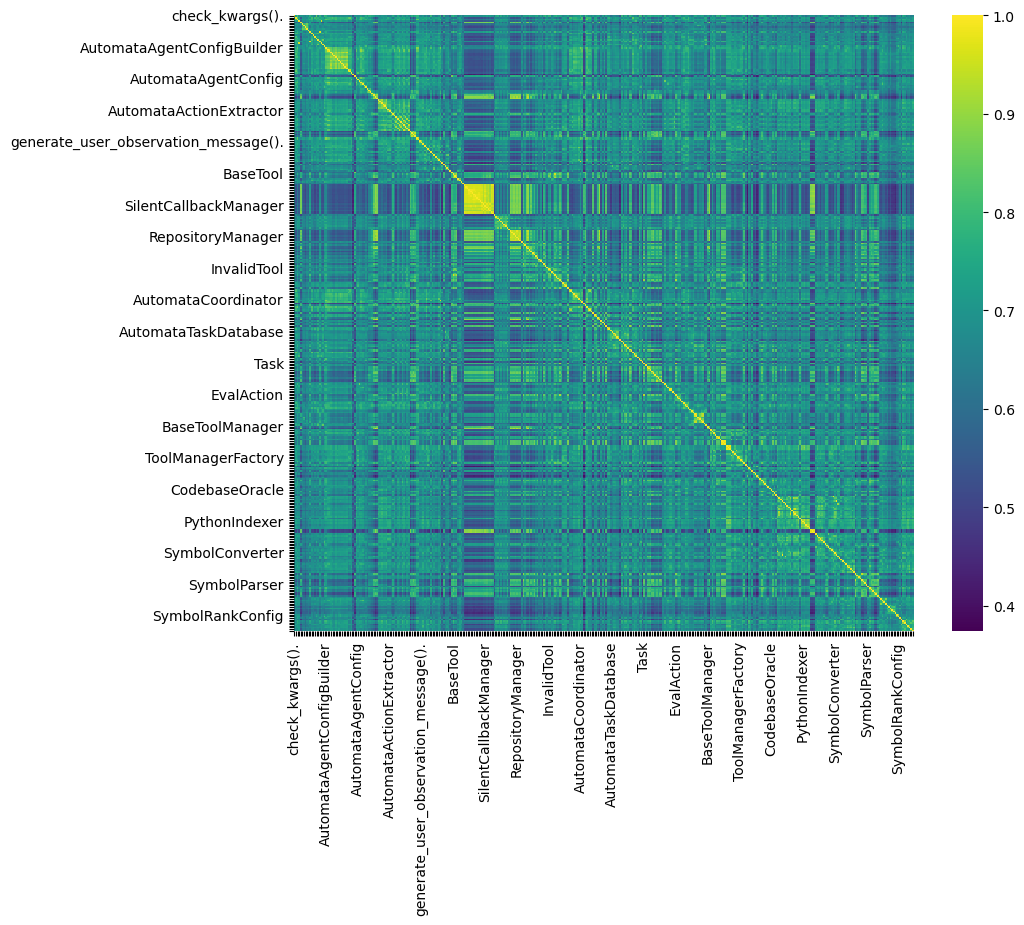

In [15]:
similarity_matrix = symbol_similarity.generate_similarity_matrix()
similarity_df = pd.DataFrame(similarity_matrix)
plot_similarity_heatmap(similarity_df)

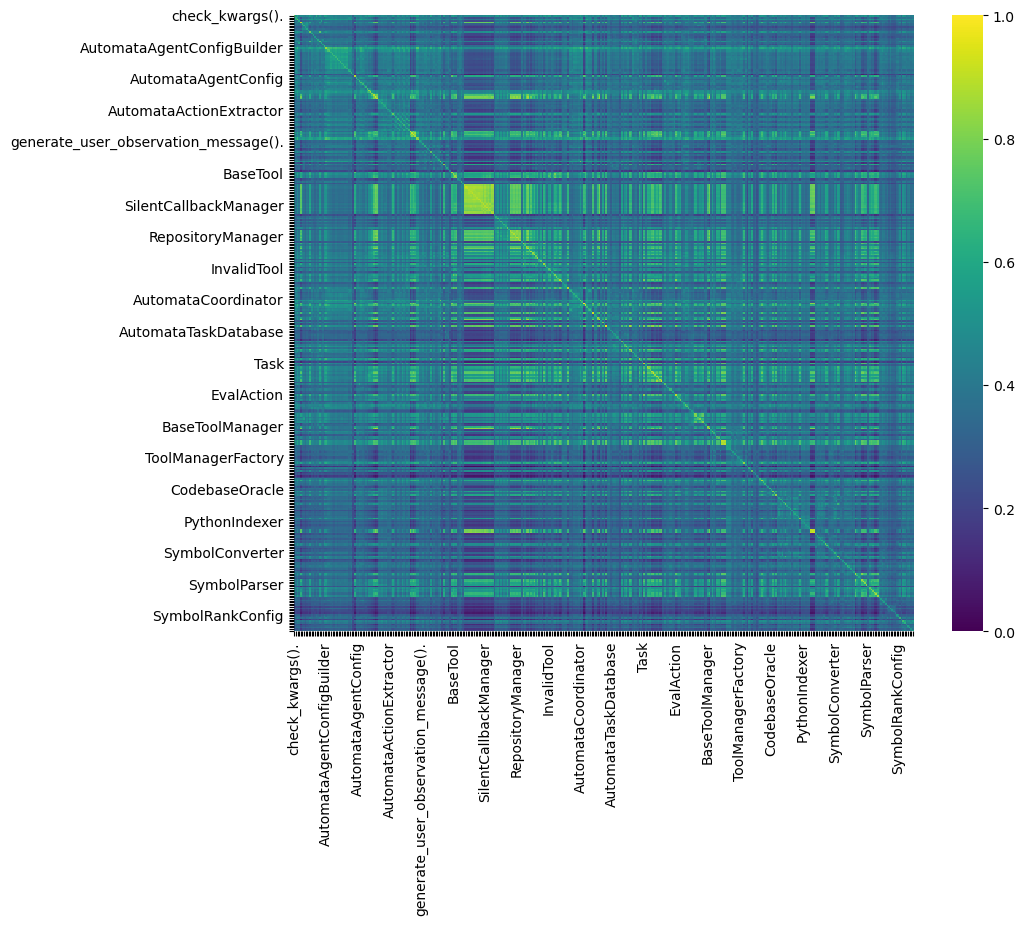

In [16]:
transformed_similarity_matrix = symbol_similarity.transform_similarity_matrix(similarity_matrix, "AutomataAgentConfigBuilder")
transformed_similarity_df = pd.DataFrame(transformed_similarity_matrix)
plot_similarity_heatmap(transformed_similarity_df)